In [80]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import random as randomp
from random import seed
from random import random
from datetime import datetime

l=1000000 #numero iteraciones
now = datetime.now()
seed(now.microsecond)
randomp.seed(now.microsecond)
#paso 0 (inicializar)
t=0
npart=100
#s=randomp.choice([1,-1],size=(npart+1,npart+1))
s=np.full((npart+1,npart+1),1)

f = open("ising_data.dat", "w")
print("hola")
for i in range(l):
  n = randomp.randint(npart)
  m = randomp.randint(npart)
  #print(n," ",m)
  #print(n," ",m)
  #condiciones de contorno
  s[0]=s[npart-1]
  s[npart]=s[1]
  s[:,0]=s[:,npart-1]
  s[:,npart]=s[:1]
  

  #print(s)
  p=min(1,math.exp((-1)*(2*s[n][m])*(s[n+1][m]+s[n-1][m]+s[n][m+1]+s[n][m-1])/t))
  #generamos numero aleatorio
  xi=random()
  #print(xi)
  if(xi<p):
    s[n][m]=-s[n][m]
    
  if(i%1000==0):  
      for j in range(npart):
        for k in range(npart):
            if(k!=npart-1):
              print(str(s[j][k])+", ",end="", file=f)
            else:
                print(s[j][k],end="", file=f)
        
        print("\n",end='',file=f)
    
      print("\n",end='',file=f)

  #print(s)
    #print("h",file=f)
f.close()

hola


/opt/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in long_scalars


/opt/apps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: loadtxt: Empty input file: "<_io.StringIO object at 0x7f9608ca87d0>"


TypeError: Invalid shape (0,) for image data

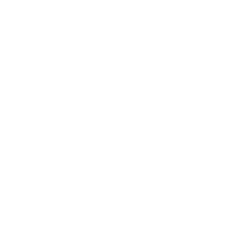

In [81]:
# ================================================================================
# ANIMACION ISING
#
# Genera una animación a partir de un fichero de datos con la configuración
# del retículo en cada instante de tiempo
# 
# El fichero debe estructurarse de la siguiente forma:
# 
#   s(1,1)_1, s(1,2)_1, ..., s(1,M)_1
#   s(2,1)_1, s(2,2)_1, ..., s(2,M)_1
#   (...)
#   s(N,1)_1, s(N,2)_1, ..., s(N,M)_1
#   
#   s(1,1)_2, s(1,2)_2, ..., s(1,M)_2
#   s(2,1)_2, s(2,2)_2, ..., s(2,M)_2
#   (...)
#   s(N,1)_2, s(N,2)_2, ..., s(N,M)_2
#
#   s(1,1)_3, s(1,2)_3, ..., s(1,M)_3
#   s(2,1)_3, s(2,2)_3, ..., s(2,M)_3
#   (...)
#   s(N,1)_3, s(N,2)_3, ..., s(N,M)_3
#   
#   (...)
#
# donde s(i,j)_k es el valor del spin en la fila i-ésima y la columna
# j-ésima en el instante k. M es el número de columnas y N el número
# de filas en el retículo. Los valores del spin deben ser +1 ó -1.
# El programa asume que las dimensiones del retículo no cambian a lo
# largo del tiempo.
# 
# Si solo se especifica un instante de tiempo, se genera una imagen en pdf
# en lugar de una animación
#
# Se puede configurar la animación cambiando el valor de las variables
# de la sección "Parámetros"
#
# ================================================================================

# Importa los módulos necesarios
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import io

# Parámetros
# ========================================
file_in = "ising_data.dat" # Nombre del fichero de datos
file_out = "ising" # Nombre del fichero de salida (sin extensión)
interval = 100 # Tiempo entre fotogramas en milisegundos
save_to_file = True # False: muestra la animación por pantalla,
                     # True: la guarda en un fichero
dpi = 150 # Calidad del vídeo de salida (dots per inch)


# Lectura del fichero de datos
# ========================================
# Lee el fichero a una cadena de texto
with open(file_in, "r") as f:
    data_str = f.read()

# Inicializa la lista con los datos de cada fotograma.
# frames_data[j] contiene los datos del fotograma j-ésimo
frames_data = list()

# Itera sobre los bloques de texto separados por líneas vacías
# (cada bloque corresponde a un instante de tiempo)
for frame_data_str in data_str.split("\n\n"):
    # Almacena el bloque en una matriz
    # (io.StringIO permite leer una cadena de texto como si fuera un
    # fichero, lo que nos permite usar la función loadtxt de numpy)
    frame_data = np.loadtxt(io.StringIO(frame_data_str), delimiter=",")

    # Añade los datos del fotograma (la configuración del sistema)
    # a la lista
    frames_data.append(frame_data)

# Creación de la animación/gráfico
# ========================================
# Crea los objetos figure y axis
fig, ax = plt.subplots()

# Define el rango de los ejes
ax.axis("off")  # No muestra los ejes

# Representa el primer fotograma
im = ax.imshow(frames_data[0], cmap="binary", vmin=-1, vmax=+1)
 
# Función que actualiza la configuración del sistema en la animación
def update(j_frame, frames_data, im):
    # Actualiza el gráfico con la configuración del sistema
    im.set_data(frames_data[j_frame])

    return im,

# Calcula el nº de frtogramas o instantes de tiempo
nframes = len(frames_data)

# Si hay más de un instante de tiempo, genera la animación
if nframes > 1:
    animation = FuncAnimation(
            fig, update,
            fargs=(frames_data, im), frames=len(frames_data), blit=True, interval=interval)

    # Muestra por pantalla o guarda según parámetros
    if save_to_file:
        animation.save("{}.mp4".format(file_out), dpi=dpi)
    else:
        plt.show()
# En caso contrario, muestra o guarda una imagen
else:
    # Muestra por pantalla o guarda según parámetros
    if save_to_file:
        fig.savefig("{}.pdf".format(file_out))
    else:
        plt.show()